## Imports

In [1]:
import sys
sys.path.append("../")

In [2]:
import os
import json

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

import torch
import lightning
from lightning.pytorch.callbacks.model_checkpoint import ModelCheckpoint
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

from monai_unet_cv_heart import Net


In [3]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device = ", device)
torch.backends.cudnn.benchmark = True

device =  cuda


In [4]:
PATH = "E:\\Visual Studio\\Task02_Heart\\"
K_FOLDS = 5

In [5]:
torch.set_float32_matmul_precision('medium')
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Function for plotting the results for each fold

In [6]:
def plot_results(net, fold):
    plt.figure("train", (12, 6))
    plt.subplot(1, 3, 1)
    plt.title("Average Loss per Epoch Training")
    x = [i for i in range(0,len(net.epoch_train_loss))]
    y = net.epoch_train_loss
    plt.xlabel("Epochs")
    plt.plot(x, y)
    plt.subplot(1, 3, 2)
    plt.title("Average Loss per Epoch Validation")
    # skip first epoch for validation loss as it is very high
    x = [i for i in range(0,len(net.epoch_val_loss)-1)]
    y = net.epoch_val_loss[1:]
    plt.xlabel("Epochs")
    plt.plot(x, y)
    plt.subplot(1, 3, 3)
    plt.title("Val Mean Dice")
    x = [i for i in range(0,len(net.metric_values))]
    y = net.metric_values
    plt.xlabel("Epochs")
    plt.plot(x, y)
    plt.suptitle(f"Results for Fold {fold}")
    plt.show()

## Do the Crossvalidation

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
g:\Anaconda\install\envs\D7043EProject\Lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
g:\Anaconda\install\envs\D7043EProject\Lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version

Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:06<00:00,  3.27s/it]current epoch: 0 current val_loss: 1.4415717124938965 current mean dice: 0.0135
best mean dice: 0.0135 at epoch: 0
Epoch 0: 100%|██████████| 28/28 [02:09<00:00,  4.62s/it, v_num=0]          current epoch: 0 current val_loss: 1.4359421730041504 current mean dice: 0.0142
best mean dice: 0.0142 at epoch: 0
Epoch 1: 100%|██████████| 28/28 [00:09<00:00,  3.03it/s, v_num=0]current epoch: 1 current val_loss: 1.2782065868377686 current mean dice: 0.0212
best mean dice: 0.0212 at epoch: 1
Epoch 2: 100%|██████████| 28/28 [00:09<00:00,  3.07it/s, v_num=0]current epoch: 2 current val_loss: 1.2364990711212158 current mean dice: 0.0239
best mean dice: 0.0239 at epoch: 2
Epoch 3: 100%|██████████| 28/28 [00:09<00:00,  3.10it/s, v_num=0]current epoch: 3 current val_loss: 1.2263433933258057 current mean dice: 0.0250
best mean dice: 0.0250 at epoch: 3
Epoch 4: 100%|██████████| 28/28 [00:09<00:00,  3.03it/s, v_num=0]current epoch: 

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 28/28 [00:10<00:00,  2.79it/s, v_num=0]


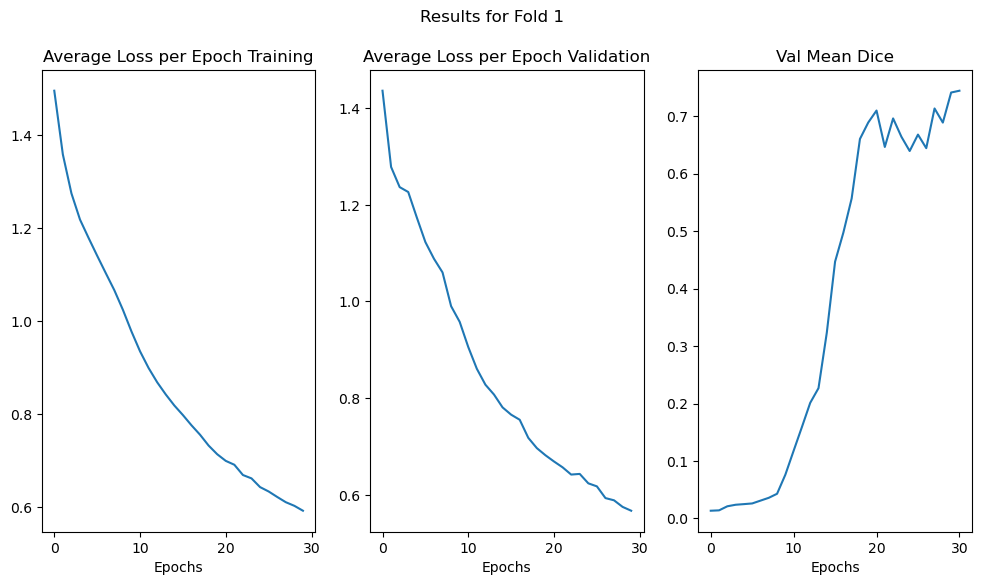

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | _model        | UNet       | 4.8 M 
1 | loss_function | DiceCELoss | 0     
---------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]current epoch: 0 current val_loss: 1.478484869003296 current mean dice: 0.0060
best mean dice: 0.0060 at epoch: 0
Epoch 0: 100%|██████████| 28/28 [00:54<00:00,  1.94s/it, v_num=1]          current epoch: 0 current val_loss: 1.418802261352539 current mean dice: 0.0097
best mean dice: 0.0097 at epoch: 0
Epoch 1: 100%|██████████| 28/28 [00:09<00:00,  2.93it/s, v_num=1]current epoch: 1 current val_loss: 1.2944633960723877 current mean dice: 0.0145
best mean dice: 0.0145 at epoch: 1
Epoch 2: 100%|██████████| 28/28 [00:11<00:00,  2.54it/s, v_num=1]current epoch: 2 current val_loss: 1.247653841972351 current mean dice: 0.0213
best mean dice: 0.0213 at epoch: 2
Epoch 3: 100%|██████████| 28/28 [00:08<00:00,  3.25it/s, v_num=1]current epoch: 3 current val_loss: 1.212012767791748 current mean dice: 0.0386
best mean dice: 0.0386 at epoch: 3
Epoch 4: 100%|██████████| 28/28 [00:09<00:00,  2.90it/s, v_num=1]current epoch: 4 cu

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 28/28 [00:09<00:00,  2.95it/s, v_num=1]


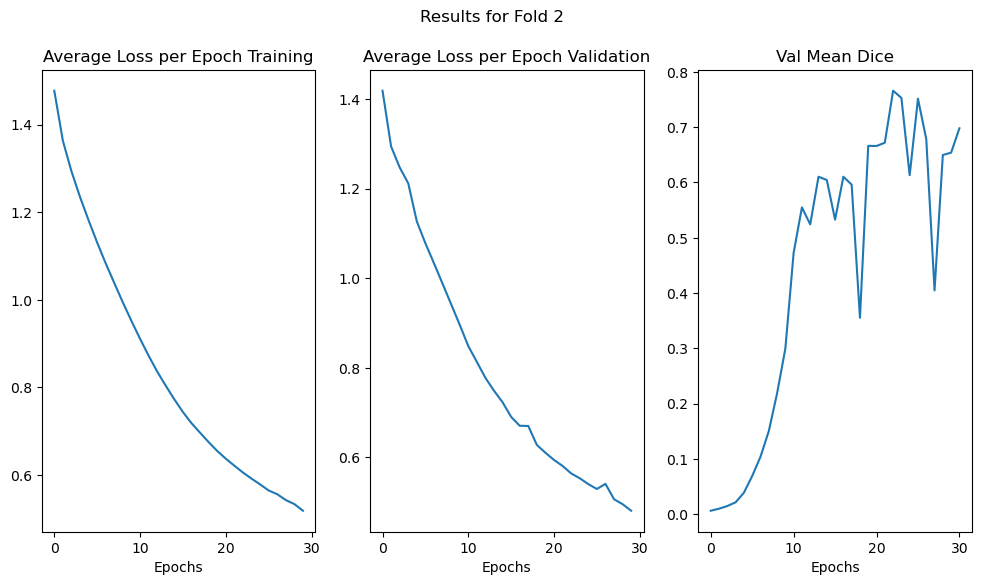

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | _model        | UNet       | 4.8 M 
1 | loss_function | DiceCELoss | 0     
---------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]current epoch: 0 current val_loss: 1.4066338539123535 current mean dice: 0.0099
best mean dice: 0.0099 at epoch: 0
Epoch 0: 100%|██████████| 28/28 [00:55<00:00,  1.98s/it, v_num=2]          current epoch: 0 current val_loss: 1.3862112760543823 current mean dice: 0.0103
best mean dice: 0.0103 at epoch: 0
Epoch 1: 100%|██████████| 28/28 [00:10<00:00,  2.62it/s, v_num=2]current epoch: 1 current val_loss: 1.348371148109436 current mean dice: 0.0142
best mean dice: 0.0142 at epoch: 1
Epoch 2: 100%|██████████| 28/28 [00:10<00:00,  2.75it/s, v_num=2]current epoch: 2 current val_loss: 1.3250529766082764 current mean dice: 0.0322
best mean dice: 0.0322 at epoch: 2
Epoch 3: 100%|██████████| 28/28 [00:09<00:00,  2.97it/s, v_num=2]current epoch: 3 current val_loss: 1.285037636756897 current mean dice: 0.0639
best mean dice: 0.0639 at epoch: 3
Epoch 4: 100%|██████████| 28/28 [00:10<00:00,  2.62it/s, v_num=2]current epoch: 4 

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 28/28 [00:10<00:00,  2.71it/s, v_num=2]


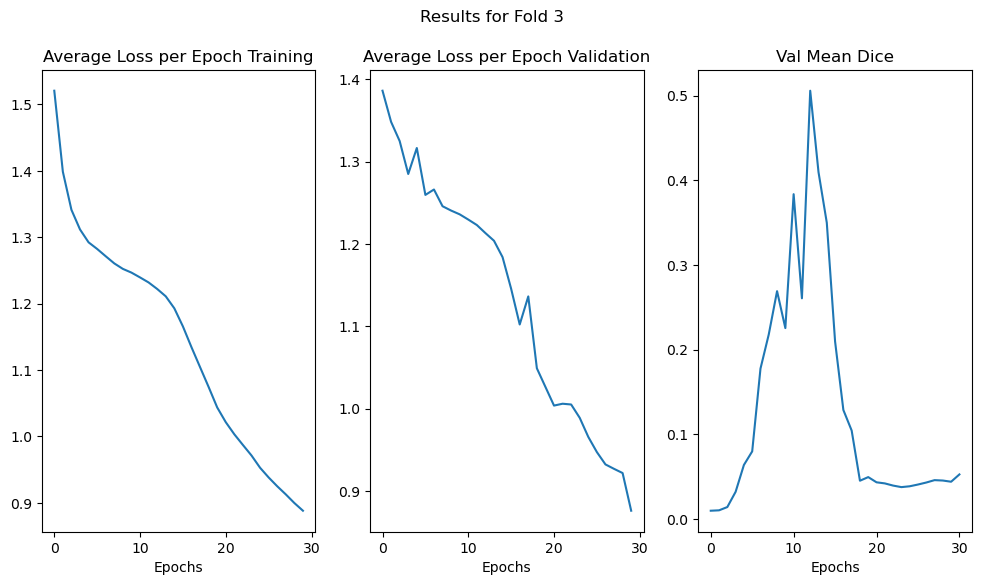

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | _model        | UNet       | 4.8 M 
1 | loss_function | DiceCELoss | 0     
---------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]current epoch: 0 current val_loss: 1.4344521760940552 current mean dice: 0.0212
best mean dice: 0.0212 at epoch: 0
Epoch 0: 100%|██████████| 30/30 [00:56<00:00,  1.88s/it, v_num=3]          current epoch: 0 current val_loss: 1.3976949453353882 current mean dice: 0.0268
best mean dice: 0.0268 at epoch: 0
Epoch 1: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s, v_num=3]current epoch: 1 current val_loss: 1.2818900346755981 current mean dice: 0.0265
best mean dice: 0.0268 at epoch: 0
Epoch 2: 100%|██████████| 30/30 [00:10<00:00,  2.85it/s, v_num=3]current epoch: 2 current val_loss: 1.2632578611373901 current mean dice: 0.0316
best mean dice: 0.0316 at epoch: 2
Epoch 3: 100%|██████████| 30/30 [00:08<00:00,  3.38it/s, v_num=3]current epoch: 3 current val_loss: 1.1757816076278687 current mean dice: 0.0455
best mean dice: 0.0455 at epoch: 3
Epoch 4: 100%|██████████| 30/30 [00:10<00:00,  2.76it/s, v_num=3]current epoch: 

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 30/30 [00:11<00:00,  2.69it/s, v_num=3]


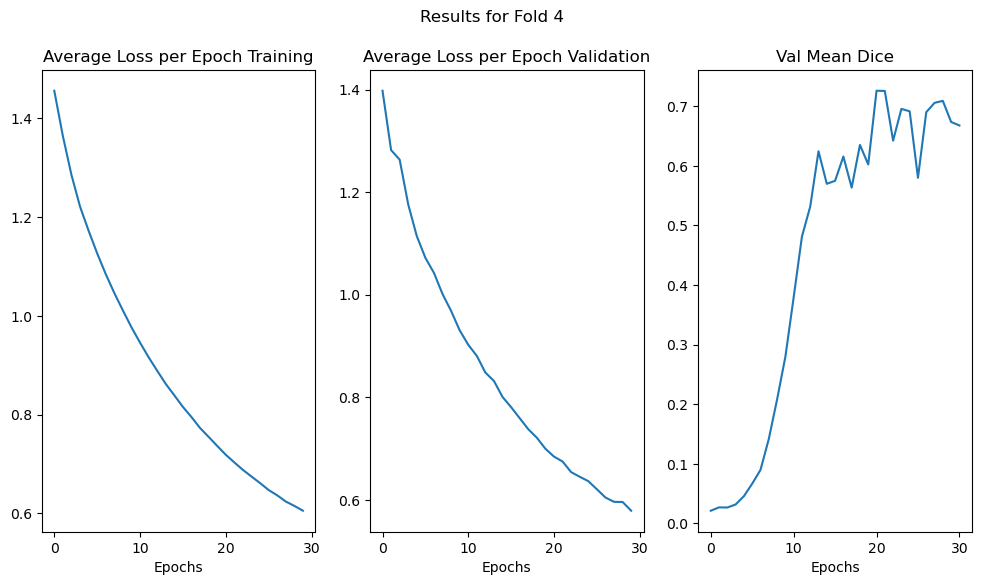

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | _model        | UNet       | 4.8 M 
1 | loss_function | DiceCELoss | 0     
---------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]current epoch: 0 current val_loss: 1.4813294410705566 current mean dice: 0.0058
best mean dice: 0.0058 at epoch: 0
Epoch 0: 100%|██████████| 30/30 [00:54<00:00,  1.81s/it, v_num=4]          current epoch: 0 current val_loss: 1.3787808418273926 current mean dice: 0.0155
best mean dice: 0.0155 at epoch: 0
Epoch 1: 100%|██████████| 30/30 [00:09<00:00,  3.02it/s, v_num=4]current epoch: 1 current val_loss: 1.319237232208252 current mean dice: 0.0186
best mean dice: 0.0186 at epoch: 1
Epoch 2: 100%|██████████| 30/30 [00:10<00:00,  2.99it/s, v_num=4]current epoch: 2 current val_loss: 1.250247836112976 current mean dice: 0.0219
best mean dice: 0.0219 at epoch: 2
Epoch 3: 100%|██████████| 30/30 [00:09<00:00,  3.23it/s, v_num=4]current epoch: 3 current val_loss: 1.2257153987884521 current mean dice: 0.0216
best mean dice: 0.0219 at epoch: 2
Epoch 4: 100%|██████████| 30/30 [00:09<00:00,  3.32it/s, v_num=4]current epoch: 4 

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 30/30 [00:10<00:00,  2.89it/s, v_num=4]


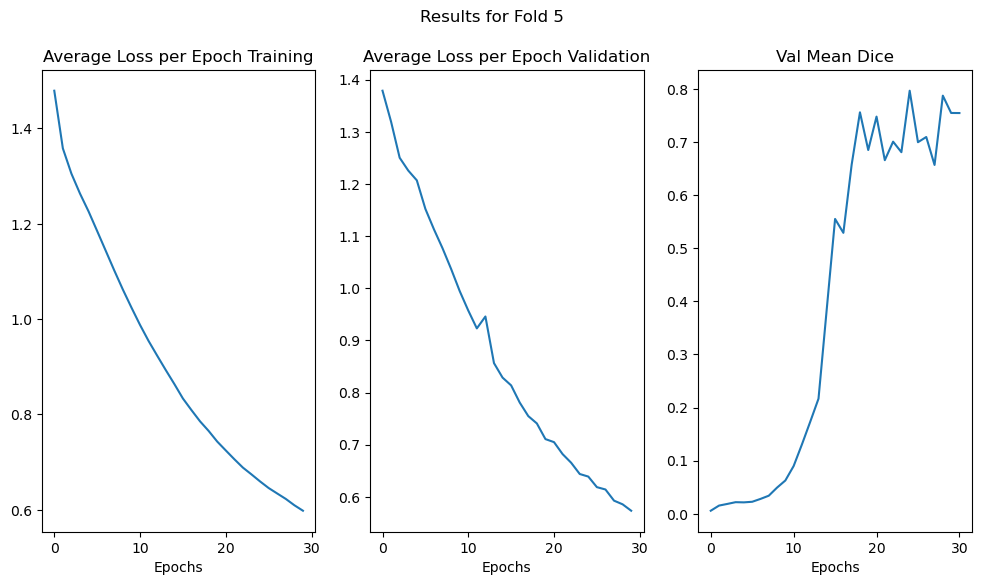

In [7]:
with open(PATH + "dataset.json", 'r') as f:
    data = json.load(f)

test_size = int(0.1 * len(data["training"]))
for i,  entry in enumerate(data["training"]):
        entry['image'] = os.path.abspath(os.path.join(PATH, entry['image']))
        entry['label'] = os.path.abspath(os.path.join(PATH, entry['label']))
test_data = data["training"][:test_size]
train_val_data = data["training"][test_size:]
kf = KFold(n_splits=K_FOLDS)

nets = []

for i, (train_index, val_index) in enumerate(kf.split(train_val_data), 1):
    data['training'] = [train_val_data[idx] for idx in train_index]
    data['validation'] = [train_val_data[idx] for idx in val_index]
    data['test'] = test_data

    # initialise the LightningModule
    net = Net(device=device, data=data, augmentation=True)

    # set up checkpoints
    #checkpoint_callback = ModelCheckpoint(dirpath="./heart_data_lightning_models/", filename='{epoch}-{val_loss:.2f}-{val_dice:.2f}', monitor="val_dice", mode="max")
    early_stopping_callback = EarlyStopping(monitor="val_loss", mode="min", patience=30)
    max_epochs = 30

    # initialise Lightning's trainer.
    trainer = lightning.Trainer(
        devices=[0],
        max_epochs=max_epochs,
        callbacks=[early_stopping_callback],
        log_every_n_steps=4,
    )

    # train
    trainer.fit(net)

    # TODO add plot of each fold validation metric
    plot_results(net, i)
    nets.append(net)

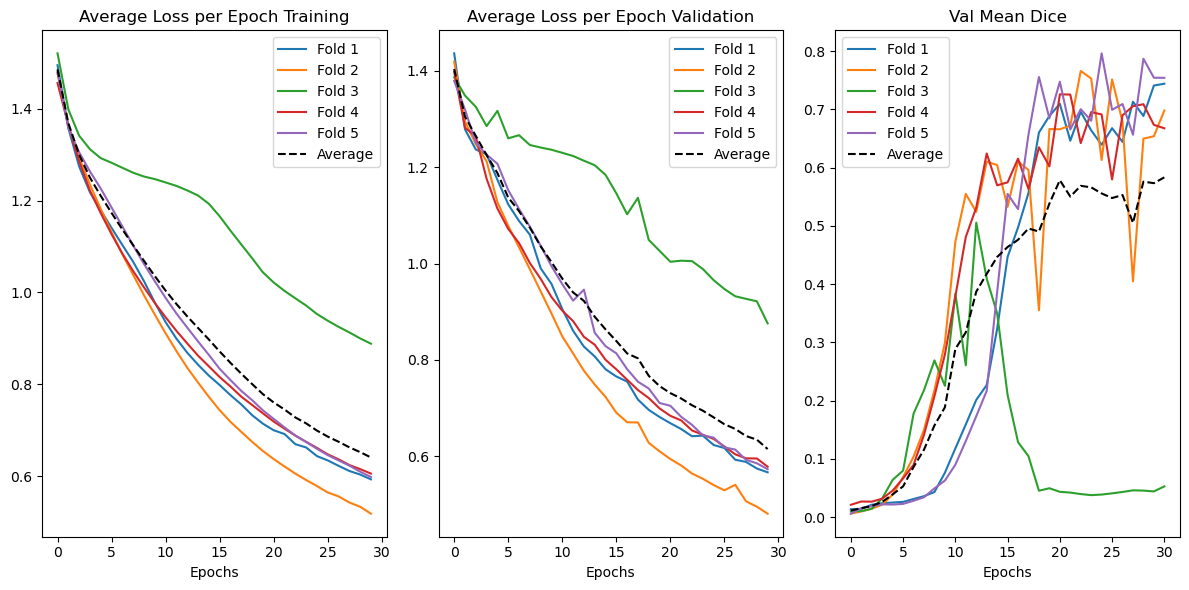

In [8]:
plt.figure("Training & Validation", (12, 6))

# Plot Average Loss per Epoch Training for all networks
plt.subplot(1, 3, 1)
plt.title("Average Loss per Epoch Training")
plt.xlabel("Epochs")
all_train_losses = []

for j, net in enumerate(nets):
    x = [i for i in range(len(net.epoch_train_loss))]
    y = net.epoch_train_loss
    plt.plot(x, y, label=f'Fold {j+1}')
    all_train_losses.append(y)

# Calculate the average for training loss
avg_train_loss = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*all_train_losses)]
plt.plot(x, avg_train_loss, '--', color='black', label='Average')

plt.legend()

# Plot Average Loss per Epoch Validation for all networks
plt.subplot(1, 3, 2)
plt.title("Average Loss per Epoch Validation")
plt.xlabel("Epochs")
all_val_losses = []

for j, net in enumerate(nets):
    x = [i for i in range(len(net.epoch_val_loss) - 1)]
    y = net.epoch_val_loss[1:]  # Skip first epoch
    plt.plot(x, y, label=f'Fold {j+1}')
    all_val_losses.append(y)

# Calculate the average for validation loss
avg_val_loss = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*all_val_losses)]
plt.plot(x, avg_val_loss, '--', color='black', label='Average')

plt.legend()

# Plot Val Mean Dice for all networks
plt.subplot(1, 3, 3)
plt.title("Val Mean Dice")
plt.xlabel("Epochs")
all_dice_scores = []

for j, net in enumerate(nets):
    x = [i for i in range(len(net.metric_values))]
    y = net.metric_values
    plt.plot(x, y, label=f'Fold {j+1}')
    all_dice_scores.append(y)

# Calculate the average for mean dice
avg_dice_score = [sum(epoch_scores) / len(epoch_scores) for epoch_scores in zip(*all_dice_scores)]
plt.plot(x, avg_dice_score, '--', color='black', label='Average')

plt.legend()

plt.tight_layout()
plt.show()
